## **Latar Belakang**
Industri fashion boutique merupakan salah satu sektor yang berkembang pesat dalam dunia bisnis. Pelaku usaha di bidang ini menghadapi berbagai tantangan, mulai dari mengelola stok, menentukan strategi harga, hingga mengatasi tingginya tingkat pengembalian barang (return rate).
Retur yang tinggi dapat menggerus margin keuntungan, menambah beban logistik, dan menurunkan kepuasan pelanggan. Oleh karena itu, perusahaan perlu memahami pola penjualan, tren musiman, perilaku belanja pelanggan, dan faktor-faktor yang memengaruhi pengembalian produk.
Dengan pemanfaatan analisis data dan machine learning, bisnis dapat memprediksi kemungkinan suatu produk akan dikembalikan sehingga strategi pencegahan dapat dilakukan sejak awal.

## **Objective**

Tujuan dari project ini adalah membangun model machine learning untuk memprediksi return rate suatu produk berdasarkan atribut yang tersedia. Dengan model ini dapat melakukan:

- Mengantisipasi produk yang berisiko tinggi diretur dan mengurangi kerugian akibat retur serta biaya logistik
- Menganalisis tren penjualan berdasarkan kategori produk, merk, musim, dan harga
- Mengidentifikasi faktor-faktor utama yang memicu pengembalian produk
- Memberikan rekomendasi strategi diskon dan pengelolaan stok yang lebih efektif

## **Dataset**
Dataset yang digunakan berjudul **Retail Fashion Boutique Data Sales Analytics 2025** yang bersumber dari Kaggle. Dataset ini berisi penjualan produk fashion dari berbagai merek terkenal dengan atribut seperti kategori produk, musim, ukuran, warna, harga, diskon, stok, rating pelanggan, status retur, dan alasan retur.

Link dataset  : https://www.kaggle.com/datasets/pratyushpuri/retail-fashion-boutique-data-sales-analytics-2025?resource=download

# Import Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import kendalltau, spearmanr

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score, average_precision_score, recall_score, roc_auc_score, make_scorer, balanced_accuracy_score, accuracy_score

# saving
import joblib


# Data Loading

In [2]:
df = pd.read_csv('fashion_boutique_dataset.csv')
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.2+ KB


**INSIGHT**
1. Terdapat 14 Kolom
  - 1 Kolom Boolean
  - 4 Kolom float
  - 1 kolom int
  - 8 kolom object
2. Memiliki 2176 baris data

**NEXT ACTION**
1. Kolom purchase date ubah tipe data menjadi datetime

In [4]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,2025-08-06,10,2.1,False,NaN
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,2025-08-06,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,NaN,Beige,79.37,54.8,35.88,2025-08-06,40,2.6,False,NaN
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,2025-08-06,20,4.9,True,Size Issue


In [5]:
df.describe()

,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176,2176.000000,1814.000000
mean,97.200340,12.144715,85.499596,2025-06-21 23:33:31.764705792,24.937960,2.986604
min,15.140000,0.000000,7.290000,2024-08-06 00:00:00,0.000000,1.000000
25%,57.872500,0.000000,46.845000,2025-08-06 00:00:00,13.000000,2.000000
50%,88.600000,0.000000,74.885000,2025-08-06 00:00:00,25.000000,3.000000
75%,127.630000,22.425000,112.865000,2025-08-06 00:00:00,37.000000,4.000000
max,249.980000,59.900000,249.980000,2025-08-06 00:00:00,50.000000,5.000000
std,51.637345,18.417786,50.091354,NaN,14.451387,1.159722


**INSIGHT**
1. orginal_price
  - memiliki nilai yang variasi mulai dari 15- 249
  - Rata rata harga di sekitar 97
  - Median harga di 88
2. markdown_percentage
  - Nilai rata-rata diskon 12%
  - Maksimal diskon sampai 59.9%
3. current_price
  - Rata-rata harga berkisar $85.5
4. stock_quantity
  - Nilai rata-rata setiap produk sekitar 25 unit
  - Median 25 Unit
5. customer_rating
  - Nilai rating bervariasi dari 1-5
  - Rata-rata rating berada di 3

In [6]:
df.isna().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [7]:
missing_counts = df.isnull().sum()
missing_percents = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percents
})

missing_df

,missing_count,missing_percent
product_id,0,0.00
category,0,0.00
brand,0,0.00
season,0,0.00
size,491,22.56
color,0,0.00
original_price,0,0.00
markdown_percentage,0,0.00
current_price,0,0.00
purchase_date,0,0.00


**INSIGHT**
1. Kolom size memiliki missing value 491, kemungkinan besar karena category accesoris
2. Kolom customer_rating memiliki missing value 362
3. Kolom returen reason memiliki missing value 1856, ini wajar karena datanya bersifat boolean True or False, yang dimana mayoritas produk tidak di retur

In [8]:
df.duplicated().sum()

np.int64(0)

Tidak memiliki data yang duplicate

# Exploratory Data Analysis (EDA)

## Distribusi Data Kolom Numerik

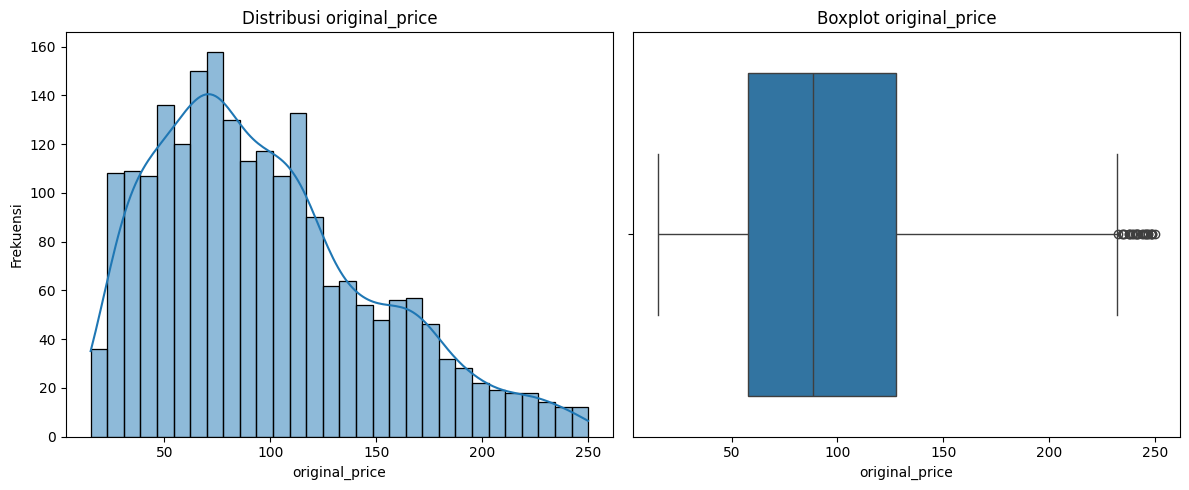

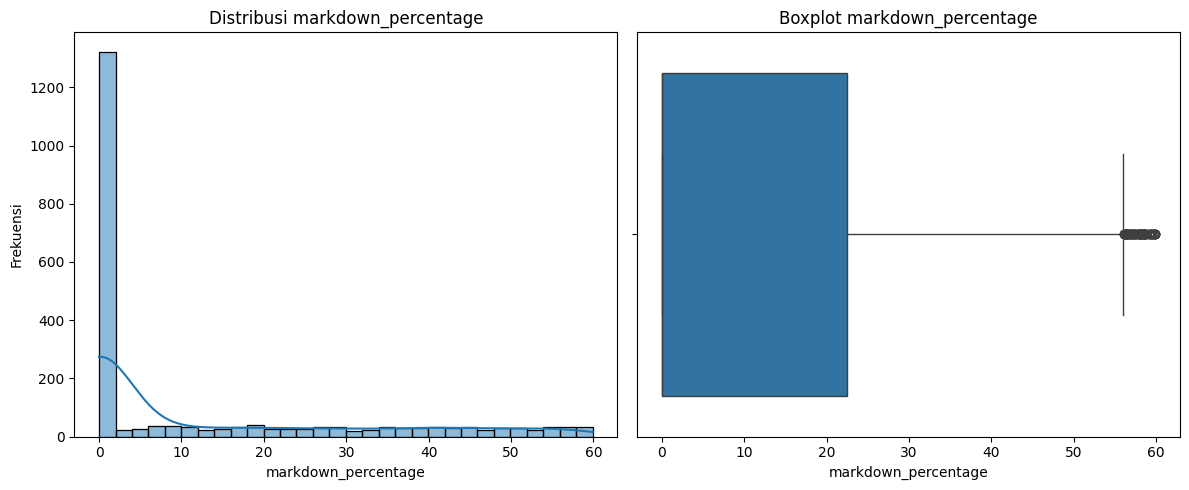

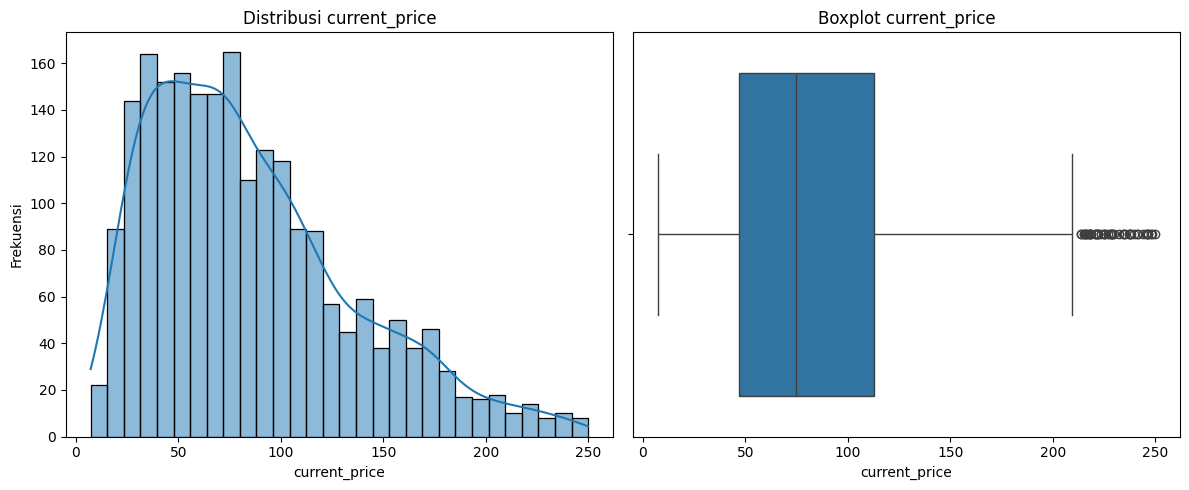

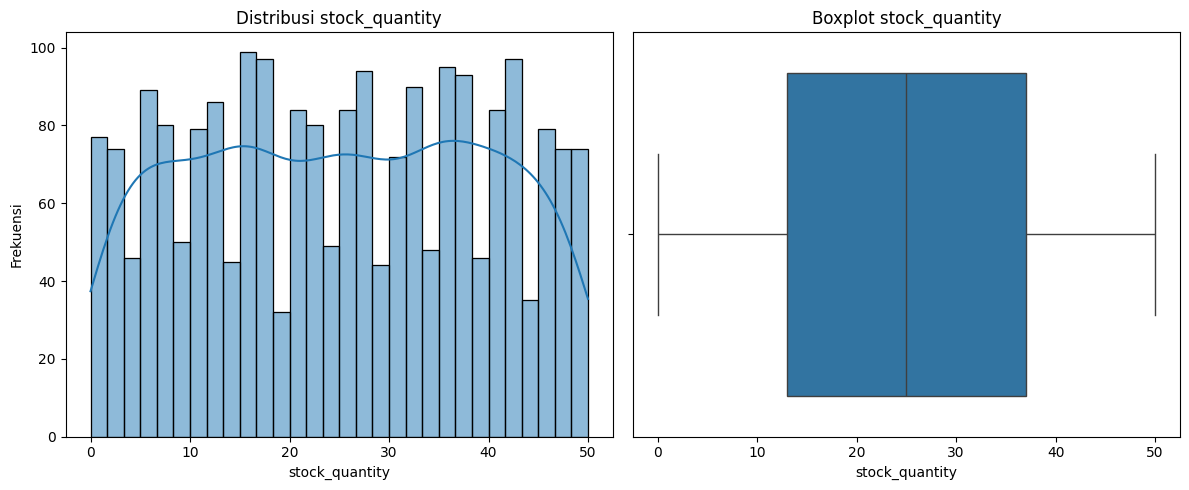

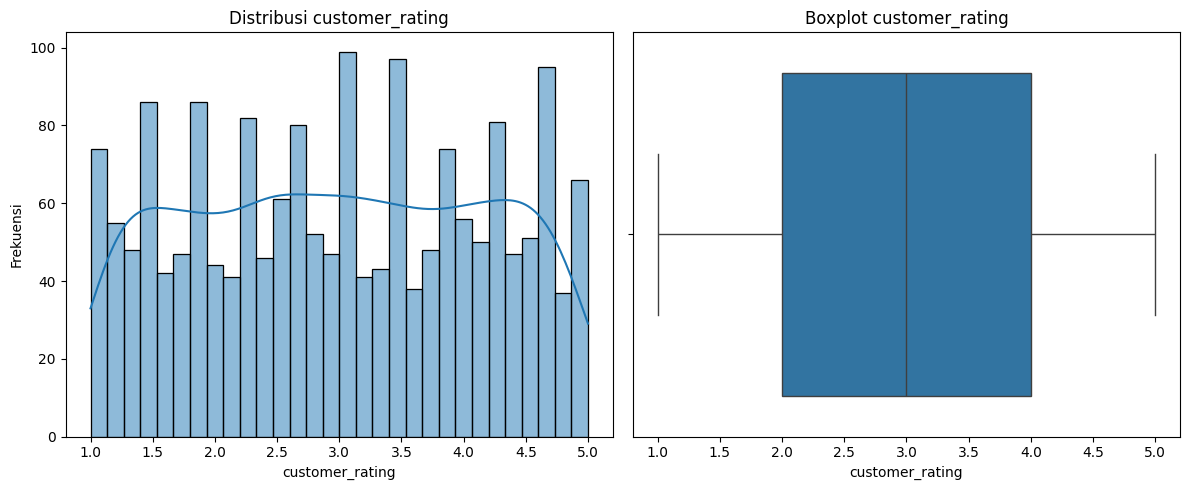

In [9]:
#set kolom numerik
numeric_cols = ['original_price', 'markdown_percentage', 'current_price', 'stock_quantity', 'customer_rating']

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


**INSIGHT**
1. original_price memiliki distribusi data condong ke kanan dan mayoritas harga ada di bawah $150, dengan outlier pada kisaran harga premium
2. markdown_percentage produk tidak mendapat diskon tertingi di 0%, sebagian kecil memiliki diskon besar hingga hampir 60%
3. current_price mengikuti pola original_price walaupun memiliki nilai yang lebih rendah karena adanya diskon
4. stock_quantity memilki distribusi data cenderung merata dengan batas maksimum 50; ada produk yang stoknya 0
5. customer_rating memiliki cenderung normal di tengah (rating 3) dab memiliki juga rating yg 1 dan 5

## Distribusi data Kolom Categorical

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


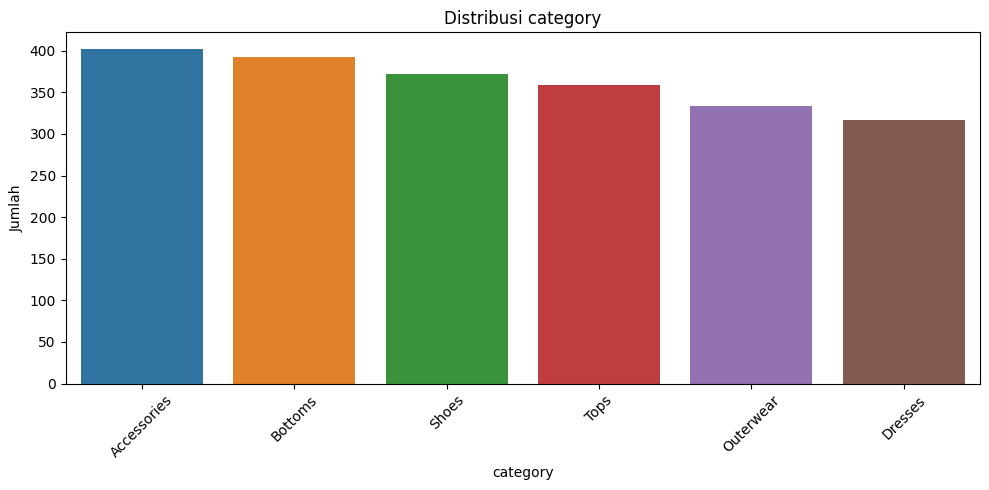

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


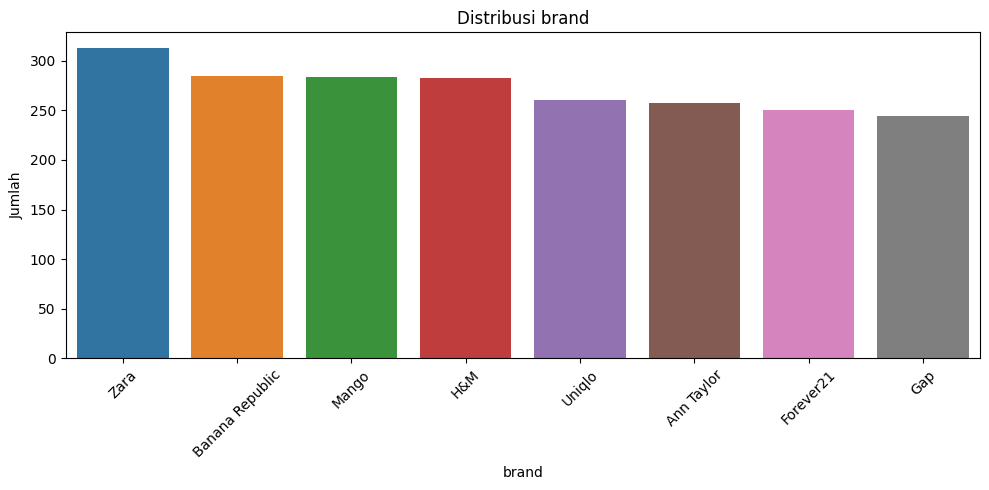

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


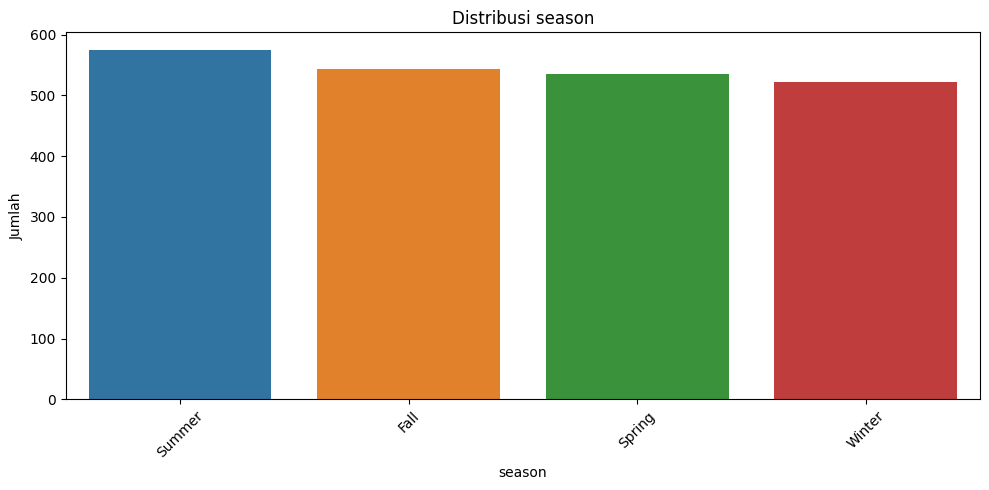

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


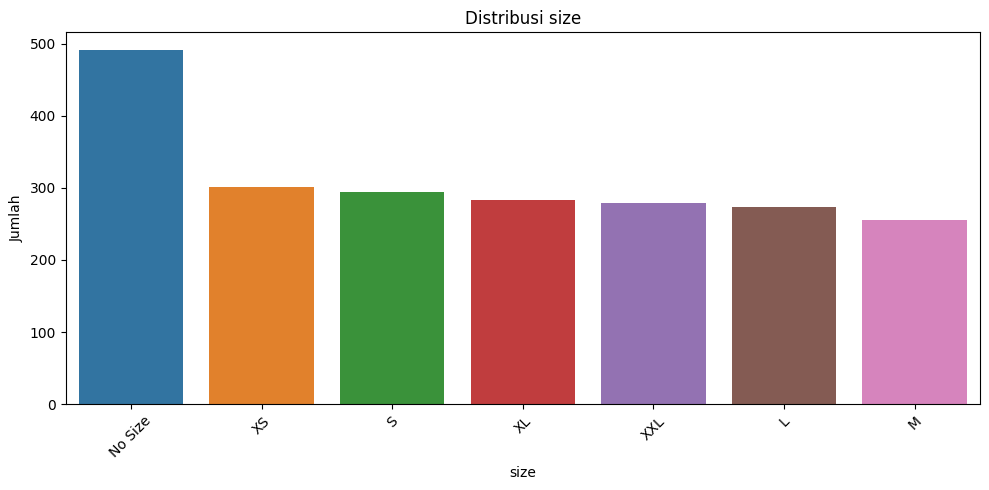

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


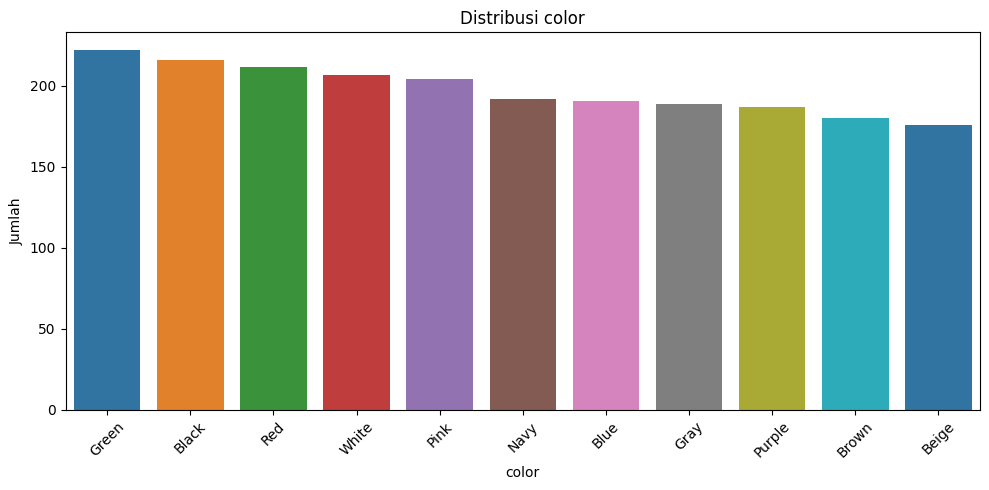

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\317806047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=order, palette="tab10")


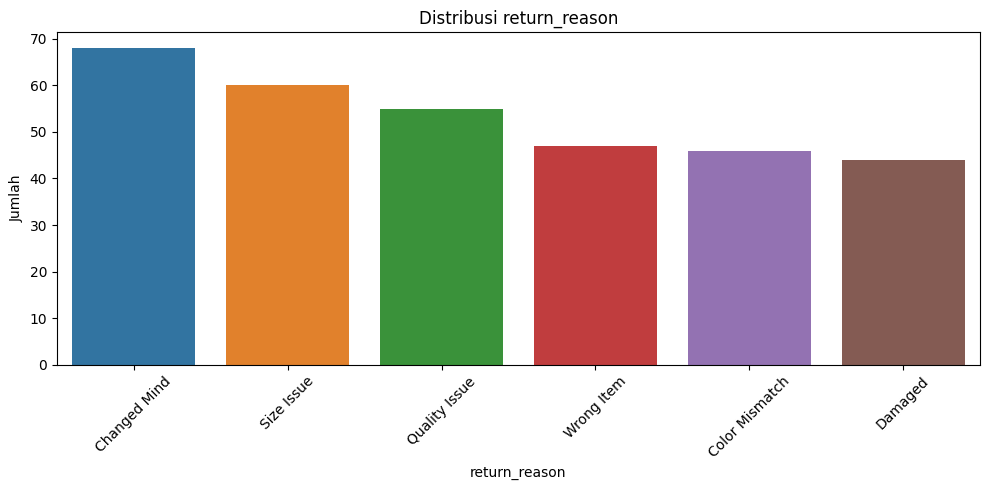

In [10]:
#handle missing value temporary untuk plot size
df_plot = df.copy()
df_plot['size'] = df_plot['size'].fillna('No Size')

#set kolom categorical
categorical_cols = ['category', 'brand', 'season', 'size', 'color', 'return_reason']



for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    order = df_plot[col].value_counts().index
    sns.countplot(data=df_plot, x=col, order=order, palette="tab10")
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Jumlah')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**INSIGHT**
1. Category
  - Accesoris merupakan kategori dengan jumlah terbanyak sekitar 400 jumlah penjualan
  - Perbedaan jumlah antar kategori tidak memiliki perbedaan yang cukup jauh
2. Brand
  - Distribusi data antara brand meiliki pesebaran yang cukup merata sehingga analisis per brand akan menjadi seimbang
3. Season
  - Penjualan terbagi menjadi 4 musim : Summer, Fall, Spring, Winter
  - Pesebaran data yang cukup merata dapat memberikan analisa tren musiman yang baik tanpa bias ke salah satu musim
4. Size
  - No size memiliki jumlah terbanyak karena mayoritas berasal dari category accesoris
  - Ukuran juga memiliki distribusi data yang merata
5. Color
  - Warna hijau memiliki dominasi warna yang paling diminati, disusul oleh hitam dan merah

## Analisis Return Rate berdasarkan kolom categorical

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\3026285933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")


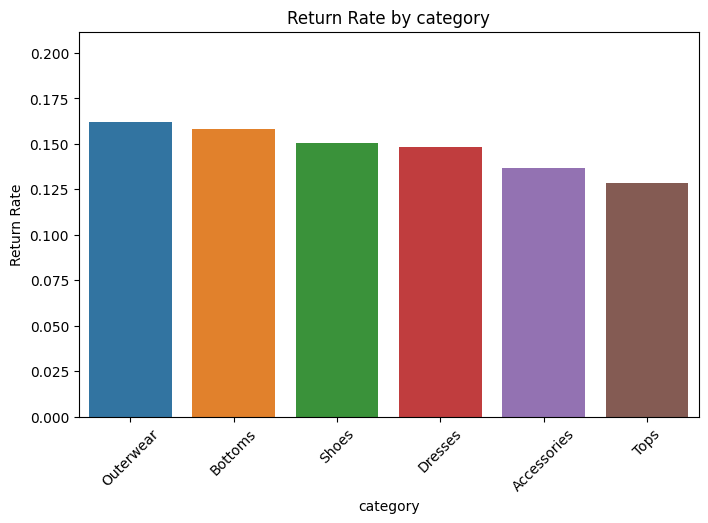

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\3026285933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")


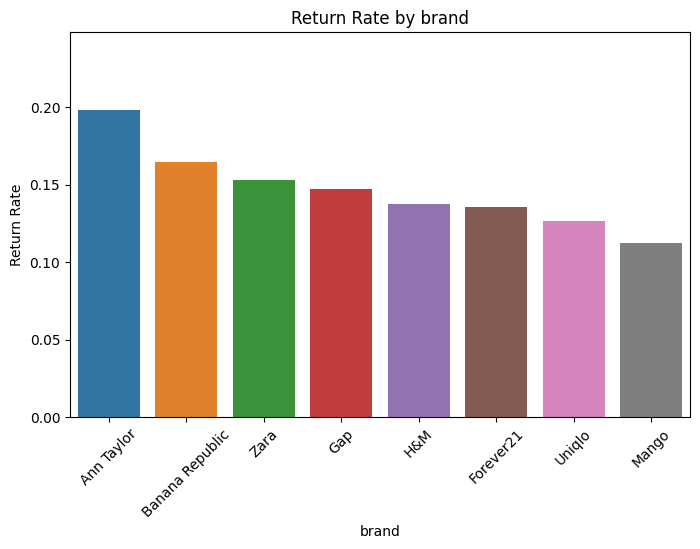

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\3026285933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")


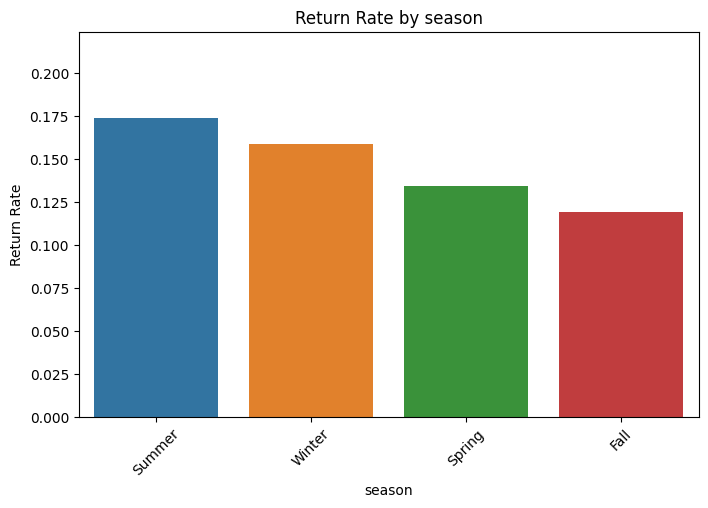

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\3026285933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")


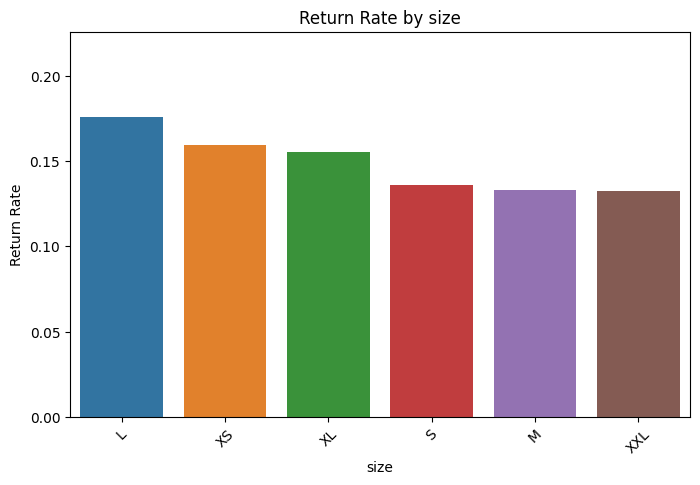

C:\Users\myrev\AppData\Local\Temp\ipykernel_31284\3026285933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")


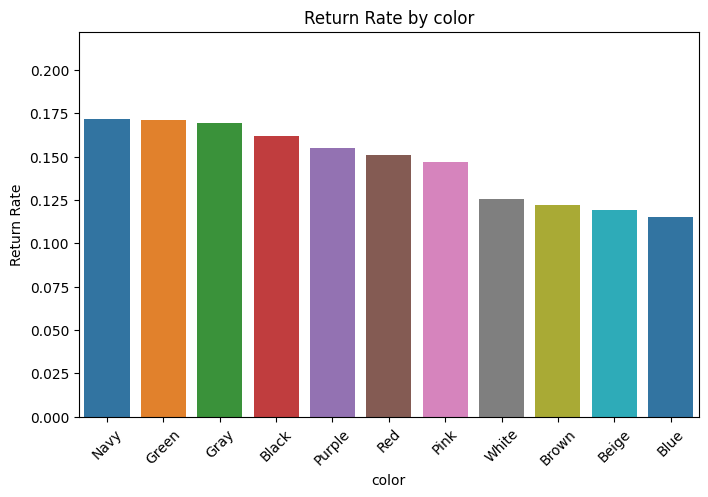

In [11]:
def plot_return_rate(column):
    plt.figure(figsize=(8,5))
    return_rate = df.groupby(column)['is_returned'].mean().sort_values(ascending=False)
    sns.barplot(x=return_rate.index, y=return_rate.values, palette="tab10")
    plt.title(f"Return Rate by {column}")
    plt.ylabel("Return Rate")
    plt.xticks(rotation=45)
    plt.ylim(0, return_rate.max() + 0.05)
    plt.show()
    return return_rate

#plot
rr_category = plot_return_rate('category')
rr_brand = plot_return_rate('brand')
rr_season = plot_return_rate('season')
rr_size = plot_return_rate('size')
rr_color = plot_return_rate('color')


**INSIGHT**
1. Category
  - Outwear memiliki return rate tertinggi sebesar 16%
  - Walaupun accesoris memiliki jumlah penjualan paling banyak, tetapi return rate nya berkisar di 13%
2. Brand
  - Brand Ann Taylor memiliki return rate paling tinggi sebesar 19%
  - Brand dengan return rate paling rendah adalah Mango 11%
3. Season
  - Summer memiliki return rate paling tinggi 17%
  - Fall memiliki return rate terendah sekitar 11%
4. Size
  - L memiliki return rate tertinggi 17,5 %
5. Color
  - Setiap warna memiliki jumlah return yg bervariasi namun tidak ada lonjakan yang cukup signifikan

In [12]:
df['is_returned'].value_counts(normalize=True) * 100

is_returned
False    85.294118
True     14.705882
Name: proportion, dtype: float64

**INSIGHT**
- Data telihat imbalance dapat dilihat dari hasil proportion, nantinya akan menggunakan teknik SMOTE untu mengurangi bias ke kelas mayoritas

# Feature Engineering

## Splitting Data

In [13]:
X = df.drop(columns=['is_returned', 'return_reason', 'product_id'], errors='ignore')
y = df['is_returned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1740, 11)
(436, 11)


## Check Cardinality

In [14]:
def check_cardinality(df, categorical_cols):
  '''
    Function untuk check cardinality kolom category
  '''
  raw_unique=[]

  for col in categorical_cols:
    row = [col, df[col].nunique(), df[col].unique()]
    raw_unique.append(row)

  result = pd.DataFrame(raw_unique, columns=['Nama Kolom', 'Total Unique', 'Unique Value'])
  return result

In [15]:
# setting display
pd.set_option('max_colwidth', None)

categorical_cols = ['category', 'brand', 'season', 'size', 'color']

check_cardinality(X_train, categorical_cols)

,Nama Kolom,Total Unique,Unique Value
0,category,6,"[Tops, Bottoms, Dresses, Shoes, Accessories, Outerwear]"
1,brand,8,"[Uniqlo, Gap, H&M, Banana Republic, Ann Taylor, Forever21, Zara, Mango]"
2,season,4,"[Fall, Summer, Winter, Spring]"
3,size,6,"[XL, XS, S, XXL, nan, M, L]"
4,color,11,"[Green, Navy, Brown, Gray, Black, White, Purple, Pink, Beige, Red, Blue]"


**INSIGHT**
1. category -> 6 kategori produk
2. brand -> 8 brand berbeda
3. season -> 4 musim (Fall, Summer, Winter, Spring)
4. size -> 6 kategori ukuran pakaian, ada yang memiliki data Nan kemungkinan besar karena kategori accesoris
5. color -> 11 warna berbeda

**NEXT ACTION**
1. Size yang memiliki value Nan dengan category Accesoris diisi dengan No size

In [16]:
X_train.loc[(X_train['category'] == 'Accessories') & (X_train['size'].isnull()), 'size'] = 'No Size'
X_test.loc[(X_test['category'] == 'Accessories') & (X_test['size'].isnull()), 'size'] = 'No Size'

## Check Outliers

In [17]:
def outliers_checker(df, numeric_cols):
  '''
  Fungsi untuk memeriksa outliers pada kolom numerik dengan mempertimbangkan skewness
  '''

  # variable kosong
  result = []

  for col in numeric_cols:
    row = []

    # add nama kolom
    row.append(col)

    # check normalitas
    if np.abs(df[col].skew()) > 1 :
      row.append('extreme skew')
    elif np.abs(df[col].skew()) > 0.5:
      row.append('skew')
    else:
      row.append('normal')

    # upper dan lower boundaries
    if row[1] == 'normal':
      upper = df[col].mean() + 3 * df[col].std()
      lower = df[col].mean() - 3 * df[col].std()
    elif row[1] == 'skew':
      iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
      upper = df[col].quantile(0.75) + 1.5 * iqr
      lower = df[col].quantile(0.25) - 1.5 * iqr
    else:
      iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
      upper = df[col].quantile(0.75) + 3 * iqr
      lower = df[col].quantile(0.25) - 3 * iqr

    # add upper and lower boundaries
    row.append(round(upper, 2))
    row.append(round(lower, 2))

    # check outliers exists or not
    if len(df.loc[(df[col] > upper)]) > 0:
      row.append('has outliers')
      row.append(round(len(df.loc[(df[col] > upper)]) / len(df) * 100,2))
    else:
      row.append('no outlier')
      row.append(0.0)


    result.append(row)

  result = pd.DataFrame(result, columns=['nama kolom', 'skewness', 'upper boundary',
                                         'lower boundary', 'outliers status', 'outlier pct (in %)'])
  return result

In [18]:
numeric_cols = ['original_price', 'markdown_percentage', 'stock_quantity', 'customer_rating', 'current_price']

outlier_report = outliers_checker(X_train, numeric_cols)
outlier_report

,nama kolom,skewness,upper boundary,lower boundary,outliers status,outlier pct (in %)
0,original_price,skew,224.13,-42.10,has outliers,1.90
1,markdown_percentage,extreme skew,97.60,-73.20,no outlier,0.00
2,stock_quantity,normal,68.52,-18.65,no outlier,0.00
3,customer_rating,normal,6.41,-0.45,no outlier,0.00
4,current_price,skew,205.73,-48.69,has outliers,2.36


**INSIGHT**
1. Original Price dan current_price memiliki skewness
2. markdown_percentage memilki skewness yang extreme

**NEXT ACTION**

Akan dilakuan handling outliers pada pipeline

## Check Missing Value

In [19]:
X_train.isna().sum()

category                 0
brand                    0
season                   0
size                    76
color                    0
original_price           0
markdown_percentage      0
current_price            0
purchase_date            0
stock_quantity           0
customer_rating        291
dtype: int64

**INSIGHT**
1. Kolom size memiliki missing value bersifat MAR, karena berhubungan dengan variabel lain

In [20]:
df.head(5)

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


## Feature Selection


In [21]:

numeric_cols = ['original_price', 'markdown_percentage', 'stock_quantity', 'customer_rating', 'current_price']

result = []

for col in numeric_cols:
    row = []
    corr, p_value = stats.spearmanr(X_train[col], y_train)

    # Add kolom
    row.append(col)

    # Add correlation
    row.append(corr)

    # Add p_value
    if p_value < 0.05:
        row.append('Correlated')
    else:
        row.append('Not Correlated')

    result.append(row)

result = pd.DataFrame(result, columns=['Nama Kolom', 'Correlated', 'Correlated Status'])

# Menampilkan hasil
result

,Nama Kolom,Correlated,Correlated Status
0,original_price,-0.013789,Not Correlated
1,markdown_percentage,0.034603,Not Correlated
2,stock_quantity,0.037022,Not Correlated
3,customer_rating,NaN,Not Correlated
4,current_price,-0.028129,Not Correlated


**INSIGHT**

Semua kolom numeric memiliki status yang lemah terhadap target

In [22]:
categorical_cols = ['category', 'brand', 'season', 'size', 'color']

rows = []
for col in categorical_cols:

    cat = X_train[col].astype(str).str.strip()
    ct = pd.crosstab(cat, y_train)
    chi2, p_val, dof, expected = stats.chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)

    status = 'Correlated' if p_val < 0.05 else 'Not Correlated'
    rows.append({
        'Chi2': round(chi2, 4),
        'p-value': round(p_val, 6),
        'Levels': ct.shape[0],
        'Correlated Status': status
    })

result = pd.DataFrame(rows, index=categorical_cols)
result


,Chi2,p-value,Levels,Correlated Status
category,4.5506,0.473144,6,Not Correlated
brand,10.0627,0.185047,8,Not Correlated
season,6.5050,0.089466,4,Not Correlated
size,4.3739,0.735849,8,Not Correlated
color,6.0162,0.813904,11,Not Correlated


**INSIGHT**

Semua kolom category memiliki status yang lemah terhadap target

In [23]:
X_train = X_train.drop(columns=['current_price'])
X_test = X_test.drop(columns=['current_price'])

Drop kolom current_price karena bersifat multikolinieritas dengan kolom original_price dan markdown_percentage

## Split numeric & category columns

In [24]:
numeric_normal = ['stock_quantity', 'customer_rating']
numeric_extreme = ['original_price', 'markdown_percentage']
category = ['category', 'brand', 'season', 'size', 'color']

## Pipeline

In [25]:
numeric_normal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_extreme_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_norm', numeric_normal_pipeline, numeric_normal),
        ('num_ext', numeric_extreme_pipeline, numeric_extreme),
        ('cat', categorical_pipeline, category)
    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('num_norm',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['stock_quantity', 'customer_rating']),
                                ('num_ext',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['original_price', 'markdown_percentage']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['category', 'brand', 'season', 'size',
                                  'color'])])

# Model Definition

In [27]:
#baseline model
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

# Model Training

## Cross Validation

In [28]:
#scoring
scoring = {
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision',
    'f1_pos': make_scorer(f1_score, pos_label=True),
    'balanced_accuracy': 'balanced_accuracy',
    'accuracy': 'accuracy',
}

#cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
#Cross validation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Gunakan cross-validation dengan metrik ROC-AUC
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    results[name] = {'mean_roc_auc': cv_scores.mean(), 'std_roc_auc': cv_scores.std()}

#summary
pd.DataFrame(results).T.sort_values(by='mean_roc_auc', ascending=False)

,mean_roc_auc,std_roc_auc
KNN,0.511547,0.023179
DecisionTree,0.488900,0.022147
RandomForest,0.485335,0.028049
SVM,0.481613,0.015993
GradientBoosting,0.478441,0.032892


**INSIGHT**

Nilai ROC-AUC untuk semua model baseline sangat rendah berkisar antara 0.47 hingga 0.51. KNN merupakan model terbaik dengan nilai 0.51. Ini menunjukkan bahwa semua model, tanpa penyesuaian (tuning), belum mampu memprediksi retur produk dengan baik

## Hyperparameter Tuning

In [30]:
#Hyperparameter tuning
knn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])  


param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_norm',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['stock_quantity',
                                                                          'customer_rating']),
                                                                        ('num_ext',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['category',
                                                                          'brand',
                                                                          'season',
                                                                          'size',
                                                                          'color'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [31]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.4f}')

print("\n--- Perbandingan Performa ---")
print(f"Baseline ROC-AUC (KNN): {results['KNN']['mean_roc_auc']:.4f}")
print(f"Tuned ROC-AUC (KNN): {grid_search.best_score_:.4f}")

Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Best ROC-AUC: 0.5479

--- Perbandingan Performa ---
Baseline ROC-AUC (KNN): 0.5115
Tuned ROC-AUC (KNN): 0.5479


ROC-AUC mengalami kenaikan dari 0.5115 ke 0.5479 setelah di tuning

# Model Evaluation

In [32]:
y_score = grid_search.predict_proba(X_test)[:, 1]
y_pred = (y_score >= 0.5)
print(f'ROC-AUC: {roc_auc_score(y_test, y_score):.2f}')

ROC-AUC: 0.48


Test ROC AUC menunjukan nilai 0.48 yang dimana berarti kombinasinya lemah

In [33]:
#classification report
print(classification_report(y_test, y_pred, target_names=["No Return", "Return"]))

              precision    recall  f1-score   support

   No Return       0.85      0.73      0.78       372
      Return       0.14      0.27      0.19        64

    accuracy                           0.66       436
   macro avg       0.50      0.50      0.48       436
weighted avg       0.75      0.66      0.70       436



**INSIGHT**
1. Recall pada Return, Model hanya berhasil menebak 27% di antaranya. Ini menunjukan, 73% produk yang akhirnya diretur gagal diprediksi oleh model
2. Precision pada Return, Ketika model memprediksi sebuah produk akan diretur, ternyata hanya 14% dari prediksi tersebut yang benar-benar diretur. Sisanya 86% model tidak model tidak dapat melakukan prediksi secara presisi


In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual_NoReturn','Actual_Return'],
                     columns=['Pred_NoReturn','Pred_Return'])

print(cm_df)

                 Pred_NoReturn  Pred_Return
Actual_NoReturn            270          102
Actual_Return               47           17


**INSIGHT**
1. TN = 270 artinya dari total produk yang sebenarnya tidak diretur, model berhasil memprediksi dengan benar 270 produk tidak akan dikembalikan. Ini adalah prediksi yang benar
2. FP = 120 artinya ada 102 produk yang sebenarnya tidak diretur, tetapi model salah memprediksi sebagai produk yang akan dikembalikan
3. FN = 47 artinya ada 47 produk yang sebenarnya diretur, tetapi model salah memprediksi sebagai produk yang tidak akan dikembalikan
4. TP = 17  artinya dari total produk yang sebenarnya diretur, model hanya berhasil memprediksi dengan benar 17 produk yang akan dikembalikan. Ini menunjukkan lemahnya kemampuan model dalam mengidentifikasi produk yang akan di retur

# Model Saving

In [35]:
joblib.dump(grid_search, "knn_tuned_pipeline.pkl") 

['knn_tuned_pipeline.pkl']

# Kesimpulan

Berdasarkan analisis dan pengujian model, dapat disimpulkan bahwa model yang telah dibangun belum optimal dalam memprediksi produk yang akan diretur. Hal ini disebabkan oleh beberapa faktor 
- Uji korelasi menunjukkan bahwa variabel numerik seperti harga, diskon, dan stok memiliki korelasi yang sangat lemah dengan tingkat retur.
- Uji Chi-Square juga menunjukan bahwa variabel kategorikal seperti kategori produk, merek, musim, ukuran, dan warna tidak memiliki hubungan signifikan dengan status retur
- Pada tahap cross-validation, performa semua model menunjukkan nilai ROC-AUC yang sangat rendah, mendekati 0.5. Angka ini menandakan model memiliki kemampuan prediksi yang setara dengan tebakan acak. Meskipun setelah tuning performa model KNN naik dari 0.5115 ke 0.5479, peningkatan ini masih tergolong kecil dan belum efektif.
- Saat diuji pada test set, nilai ROC-AUC turun ke 0.46. Penurunan ini menunjukkan model tidak stabil dan gagal melakukan generalisasi pada data baru
- Meskipun telah dilakukan penyeimbangan data menggunakan SMOTE, model ini belum berhasil menemukan pola yang relevan dari atribut yang ada